# **520TonEnjPres VERİLERİ TEMİZLEME**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 520TonEnjPres Verileri dosyasını oku
df = pd.read_excel("orijinal_veri/520TonEnjPres.xlsx")

In [3]:
df.shape

(2630, 13)

In [4]:
df.head()

,tarih,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS
0,2025-01-14 14:52:39,1,56911,MAK1,0.10,7,2.81,54,112,272,170,808,612
1,2025-01-14 14:51:53,1,56910,MAK1,0.10,6,2.98,54,112,275,170,888,618
2,2025-01-14 14:50:40,1,56909,MAK1,0.09,7,2.97,55,116,274,169,828,616
3,2025-01-14 14:49:50,1,56908,MAK1,0.09,8,2.81,54,116,274,169,812,616
4,2025-01-14 14:49:03,1,56907,MAK1,0.09,7,2.96,54,116,273,170,812,614


In [5]:
# Veri türleri
df.dtypes

tarih              datetime64[ns]
kalip                       int64
cycleSayisi                 int64
makineKodu                 object
SCLPAR_VALUE_V1           float64
SCLPAR_VALUE_P1             int64
SCLPAR_VALUE_V2           float64
SCLPAR_VALUE_L2             int64
SCLPAR_VALUE_TM             int64
SCLPAR_VALUE_P3             int64
SCLPAR_VALUE_SM             int64
SCLPAR_VALUE_TR             int64
SCLPAR_VALUE_PS             int64
dtype: object

In [6]:
# Eksik veri kontrolü
df.isnull().sum().sort_values(ascending=False)

tarih              0
kalip              0
cycleSayisi        0
makineKodu         0
SCLPAR_VALUE_V1    0
SCLPAR_VALUE_P1    0
SCLPAR_VALUE_V2    0
SCLPAR_VALUE_L2    0
SCLPAR_VALUE_TM    0
SCLPAR_VALUE_P3    0
SCLPAR_VALUE_SM    0
SCLPAR_VALUE_TR    0
SCLPAR_VALUE_PS    0
dtype: int64

## Veri Ön İşleme

In [7]:
df.shape

(2630, 13)

In [8]:
df.head()

,tarih,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS
0,2025-01-14 14:52:39,1,56911,MAK1,0.10,7,2.81,54,112,272,170,808,612
1,2025-01-14 14:51:53,1,56910,MAK1,0.10,6,2.98,54,112,275,170,888,618
2,2025-01-14 14:50:40,1,56909,MAK1,0.09,7,2.97,55,116,274,169,828,616
3,2025-01-14 14:49:50,1,56908,MAK1,0.09,8,2.81,54,116,274,169,812,616
4,2025-01-14 14:49:03,1,56907,MAK1,0.09,7,2.96,54,116,273,170,812,614


Tekrarlayan CycleSayisi Değerlerinin Temizlenmesi

In [9]:
tekrar_eden_degerler = df['cycleSayisi'].value_counts()
tekrar_eden_degerler = tekrar_eden_degerler[tekrar_eden_degerler > 1]
print(tekrar_eden_degerler.index.tolist())

[54408, 54829, 56763, 56367]


In [10]:
# cycleSayisi sütununda aynı değerden birden fazla varsa, sadece ilkini bırak, diğerlerini sil
df_unique = df.drop_duplicates(subset=["cycleSayisi"], keep="first")

In [11]:
df_x = df_unique

Dakikalık Frekansta Veri Tutarlılığı Sağlama

In [12]:
df_cleaned = (
    df_x.sort_values('tarih')
      .groupby(df_x['tarih'].dt.floor('T'), as_index=False)
      .first()
)

C:\Users\havva\AppData\Local\Temp\ipykernel_1208\3764887737.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(df_x['tarih'].dt.floor('T'), as_index=False)


In [13]:
# İlk 5 satıra bakalım
df_cleaned.head()

,tarih,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS
0,2025-01-07 23:07:47,1,54285,MAK1,0.10,5,2.52,53,992,371,171,1004,834
1,2025-01-07 23:08:32,1,54286,MAK1,0.10,6,2.42,53,924,368,172,936,828
2,2025-01-07 23:09:14,1,54287,MAK1,0.09,6,2.79,59,904,380,165,916,855
3,2025-01-07 23:10:39,1,54289,MAK1,0.09,6,2.95,60,920,385,164,928,866
4,2025-01-07 23:11:23,1,54290,MAK1,0.09,6,2.99,62,928,391,162,944,879


In [14]:
df_cleaned.shape

(1989, 13)

In [15]:
# KONTROL 
# Tarihleri dakikaya indir
minutes = df_cleaned['tarih'].dt.floor('T')

# Her dakikanın kaç kere geçtiğini kontrol et
minute_counts = minutes.value_counts()
# print(minute_counts)

# Tekrar eden dakikaları filtrele
repeated_minutes = minute_counts[minute_counts > 1]
print(repeated_minutes)


Series([], Name: count, dtype: int64)


C:\Users\havva\AppData\Local\Temp\ipykernel_1208\670320634.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  minutes = df_cleaned['tarih'].dt.floor('T')


In [16]:
df_cleaned.head(2)

,tarih,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS
0,2025-01-07 23:07:47,1,54285,MAK1,0.1,5,2.52,53,992,371,171,1004,834
1,2025-01-07 23:08:32,1,54286,MAK1,0.1,6,2.42,53,924,368,172,936,828


## Zaman Yoğunluğu ve Eksik Veri Analizi

In [17]:
from datetime import datetime, timedelta
import pandas as pd

def eksik_zaman_araliklarini_bul(df):
    # Zaman sütunu datetime formatına çevrilmiş olmalı
    df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")

    # Tüm tarih aralığını belirle
    full_days = pd.date_range(
        start=df["datetime"].min().normalize(),
        end=df["datetime"].max().normalize(),
        freq="D"
    ).date

    missing_ranges_per_day = {}
    eksik_dakika_istatistik = {}

    for date in full_days:
        daily_df = df[df["datetime"].dt.date == date]

        if daily_df.empty:
            missing_ranges_per_day[date] = [("Tüm gün", "veri yok")]
            eksik_dakika_istatistik[date] = 1440
            continue

        mevcut_saatler = daily_df["datetime"].dt.strftime("%H:%M")

        full_range = pd.date_range(
            start=datetime.combine(date, datetime.min.time()),
            end=datetime.combine(date, datetime.max.time()),
            freq="T"
        ).strftime("%H:%M")

        missing_minutes = sorted(set(full_range) - set(mevcut_saatler))

        if missing_minutes:
            ranges = []
            start = missing_minutes[0]
            for i in range(1, len(missing_minutes)):
                prev = datetime.strptime(missing_minutes[i - 1], "%H:%M")
                curr = datetime.strptime(missing_minutes[i], "%H:%M")
                if (curr - prev) != timedelta(minutes=1):
                    end = missing_minutes[i - 1]
                    ranges.append((start, end))
                    start = missing_minutes[i]
            ranges.append((start, missing_minutes[-1]))
            missing_ranges_per_day[date] = ranges

            toplam_eksik = sum(
                (datetime.strptime(end, "%H:%M") - datetime.strptime(start, "%H:%M")).seconds // 60 + 1
                for start, end in ranges
            )
            eksik_dakika_istatistik[date] = toplam_eksik
        else:
            eksik_dakika_istatistik[date] = 0

    # Bilgilendirme çıktısı
    for date in full_days:
        print(f"{date} tarihinde eksik zaman aralıkları:")
        for r in missing_ranges_per_day.get(date, []):
            if r == ("Tüm gün", "veri yok"):
                print(f" - Tüm gün veri yok")
            elif r[0] == r[1]:
                print(f" - {r[0]} eksik")
            else:
                print(f" - {r[0]} ile {r[1]} arası eksik")
        print(f"Toplam eksik dakika: {eksik_dakika_istatistik.get(date, 0)} dk\n")

    return missing_ranges_per_day, eksik_dakika_istatistik


In [18]:

if "datetime" not in df_cleaned.columns:
    if "tarih" in df_cleaned.columns:
        df_cleaned["datetime"] = pd.to_datetime(df_cleaned["tarih"], errors="coerce")
    else:
        raise KeyError("Hem 'datetime' hem 'tarih' sütunu eksik!")

Eksik Zaman Aralıklarının Tespiti

In [19]:
# Veride eksik dakikaları ve tamamen boş günleri tespit ettim
missing_ranges_per_day, eksik_dakikalar = eksik_zaman_araliklarini_bul(df_cleaned)

C:\Users\havva\AppData\Local\Temp\ipykernel_1208\1635274555.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(
C:\Users\havva\AppData\Local\Temp\ipykernel_1208\1635274555.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(
C:\Users\havva\AppData\Local\Temp\ipykernel_1208\1635274555.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(
C:\Users\havva\AppData\Local\Temp\ipykernel_1208\1635274555.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(
C:\Users\havva\AppData\Local\Temp\ipykernel_1208\1635274555.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(
C:\Users\havva\

2025-01-07 tarihinde eksik zaman aralıkları:
 - 00:00 ile 23:06 arası eksik
 - 23:21 eksik
 - 23:53 eksik
Toplam eksik dakika: 1389 dk

2025-01-08 tarihinde eksik zaman aralıkları:
 - 00:21 eksik
 - 00:25 ile 00:29 arası eksik
 - 00:47 ile 00:51 arası eksik
 - 00:53 ile 00:57 arası eksik
 - 00:59 ile 01:00 arası eksik
 - 01:04 ile 01:06 arası eksik
 - 01:08 ile 01:09 arası eksik
 - 01:13 ile 01:32 arası eksik
 - 01:35 ile 01:37 arası eksik
 - 01:51 ile 01:54 arası eksik
 - 02:11 ile 02:13 arası eksik
 - 02:54 eksik
 - 03:00 eksik
 - 03:02 eksik
 - 03:25 eksik
 - 03:28 eksik
 - 03:43 ile 04:18 arası eksik
 - 04:37 eksik
 - 04:42 eksik
 - 04:50 eksik
 - 04:55 eksik
 - 05:04 ile 05:07 arası eksik
 - 05:17 ile 23:03 arası eksik
 - 23:44 ile 23:46 arası eksik
Toplam eksik dakika: 1172 dk

2025-01-09 tarihinde eksik zaman aralıkları:
 - 00:28 ile 00:31 arası eksik
 - 00:33 ile 00:34 arası eksik
 - 00:36 eksik
 - 00:41 eksik
 - 00:45 eksik
 - 00:59 ile 01:01 arası eksik
 - 01:04 eksik
 - 01:1

C:\Users\havva\AppData\Local\Temp\ipykernel_1208\1635274555.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

def eksik_veri_heatmap(missing_ranges_per_day):
    """
    Günlük eksik zaman aralıklarına göre saat bazlı eksik dakika yoğunluk ısı haritası oluşturur.

    Parametre:
    - missing_ranges_per_day: dict, her gün için eksik zaman aralıklarını içeren sözlük
        Örnek:
        {
            '2024-04-10': [('00:10', '00:20'), ('13:00', '13:45')],
            '2024-04-11': [('Tüm gün', 'veri yok')],
            ...
        }

    Döndürür:
    - heatmap_data: pandas DataFrame, saat bazlı eksik dakika sayıları
    """
    # 1. Saat bazlı eksik dakika matrisini oluştur
    heatmap_data = pd.DataFrame(
        0,
        index=sorted(missing_ranges_per_day.keys()),
        columns=[f"{h:02}" for h in range(24)]
    )

    # 2. Eksik zaman aralıklarını saat bazında topla
    for date, ranges in missing_ranges_per_day.items():
        for r in ranges:
            if r == ("Tüm gün", "veri yok"):
                for hour in range(24):
                    heatmap_data.loc[date, f"{hour:02}"] += 60
            else:
                start = datetime.strptime(r[0], "%H:%M")
                end = datetime.strptime(r[1], "%H:%M")
                delta = (end - start).seconds // 60 + 1

                for i in range(delta):
                    minute = start + timedelta(minutes=i)
                    heatmap_data.loc[date, f"{minute.hour:02}"] += 1

    # 3. Görselleştir
    plt.figure(figsize=(16, len(heatmap_data) * 0.4 + 3))
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt="d",
        cmap="Reds",
        linewidths=0.5,
        linecolor='gray',
        cbar_kws={'label': 'Eksik Dakika Sayısı'}
    )
    plt.title("Her Günün Saat Bazında Eksik Dakika Yoğunluğu", fontsize=14)
    plt.xlabel("Saat (00–23)")
    plt.ylabel("Tarih")
    plt.tight_layout()
    plt.show()

    return heatmap_data


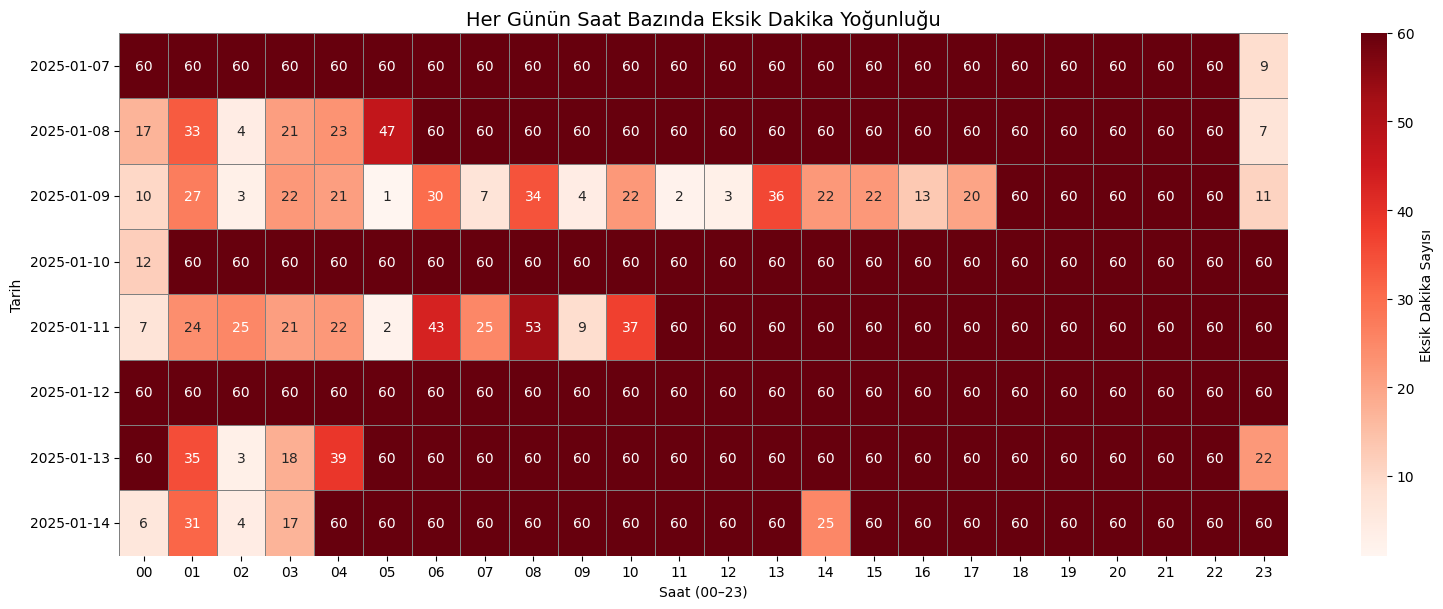

In [21]:
eksik_df = eksik_veri_heatmap(missing_ranges_per_day)

Günlük ve Saatlik Veri Yoğunluğu Heatmap'i

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_daily_hourly_heatmap(df, datetime_column="datetime"):
    """
    Belirtilen datetime sütununa göre günlük ve saatlik veri yoğunluğu heatmap'i çizer.
    
    Parametreler:
    - df: pandas DataFrame
    - datetime_column: datetime tipinde olması gereken sütun adı
    """
    df = df.copy()

    # 1. Zaman sütunu datetime tipine çevrilir
    df[datetime_column] = pd.to_datetime(df[datetime_column], errors='coerce')

    # 2. Gün ve saat sütunlarını oluştur
    df["Tarih"] = df[datetime_column].dt.date
    df["Saat"] = df[datetime_column].dt.hour

    # 3. Pivot tablo: Gün x Saat → Kayıt Sayısı
    heatmap_df = df.groupby(["Tarih", "Saat"]).size().unstack(fill_value=0)

    # 4. Görselleştirme
    plt.figure(figsize=(14, len(heatmap_df) * 0.4 + 3))
    sns.heatmap(heatmap_df, annot=True, fmt="d", cmap="YlGnBu",
                linewidths=0.5, linecolor='gray',
                cbar_kws={'label': 'Veri Sayısı'})
    plt.title("Günlük ve Saatlik Veri Sayısı Heatmap", fontsize=14)
    plt.xlabel("Saat")
    plt.ylabel("Tarih")
    plt.tight_layout()
    plt.show()


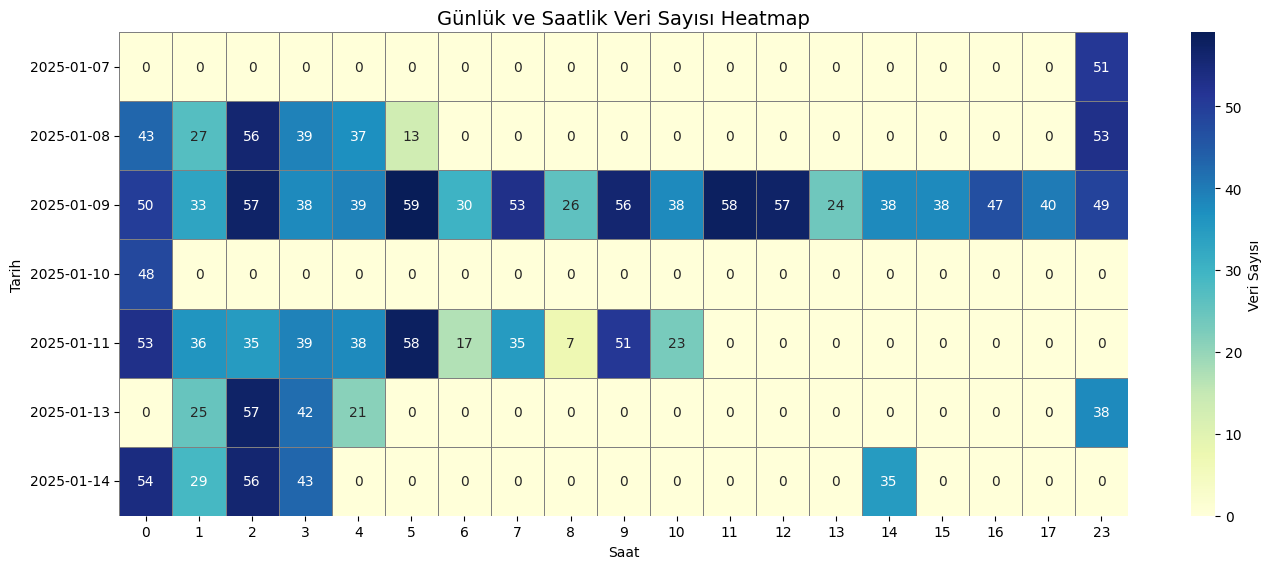

In [23]:
plot_daily_hourly_heatmap(df_cleaned, datetime_column = "tarih")

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def saatlik_veri_yogunlugu(df):
    df = df.copy()
    df["tarih"] = pd.to_datetime(df["tarih"])  # Eğer zaten datetime ise bu satır opsiyonel
    df["saat"] = df["tarih"].dt.hour

    saatlik_sayim = df.groupby("saat").size()

    # Görselleştirme
    plt.figure(figsize=(10, 4))
    plt.bar(saatlik_sayim.index, saatlik_sayim.values, color="skyblue")
    plt.xticks(range(0, 24))
    plt.xlabel("Saat")
    plt.ylabel("Toplam Veri Sayısı")
    plt.title("Saatlik Bazda Toplam Veri Sayısı")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return saatlik_sayim


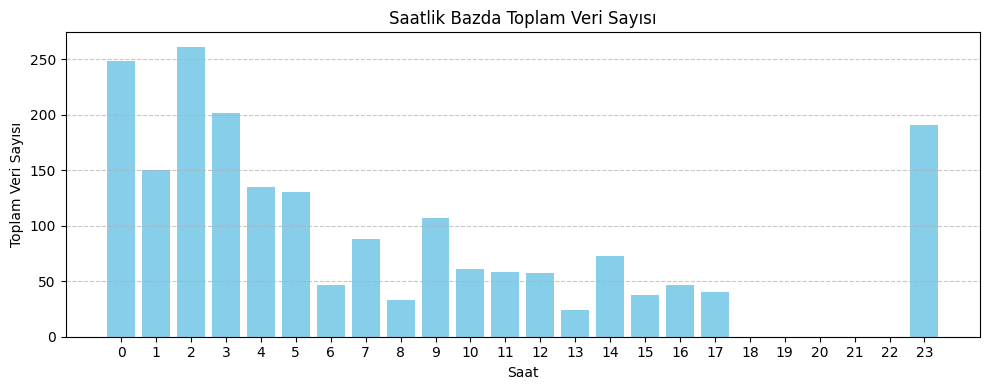

saat
0     248
1     150
2     261
3     201
4     135
5     130
6      47
7      88
8      33
9     107
10     61
11     58
12     57
13     24
14     73
15     38
16     47
17     40
23    191
dtype: int64


In [25]:
saatlik_sayim = saatlik_veri_yogunlugu(df_cleaned)
print(saatlik_sayim)

Az Verili Günlerin Filtrelenmesi: En Az 4 Saat Kuralı

In [26]:
 
import pandas as pd

df_cleaned["tarih"] = pd.to_datetime(df_cleaned["tarih"])

# Saat sütunu oluştur 
df_cleaned["saat"] = df_cleaned["tarih"].dt.hour
df_cleaned["gun"] = df_cleaned["tarih"].dt.date

# Her gün kaç farklı saatte veri var? (Saatlik doluluk sayısı)
saatlik_doluluk = df_cleaned.groupby("gun")["saat"].nunique()

# En az 4 saat veri bulunan günleri seç
yeterli_gunler = saatlik_doluluk[saatlik_doluluk >= 4].index

# Bu günlerdeki verileri filtrele
df_temiz = df_cleaned[df_cleaned["gun"].isin(yeterli_gunler)].copy()

print("Yeterli veriye sahip günler:")
print(yeterli_gunler)


Yeterli veriye sahip günler:
Index([2025-01-08, 2025-01-09, 2025-01-11, 2025-01-13, 2025-01-14], dtype='object', name='gun')


In [27]:
# 'tarih' sütunundan gün bilgisini çıkar
df_cleaned["gun"] = df_cleaned["tarih"].dt.date

# Her gün kaç veri (dakika) var?
gunluk_veri_sayisi = df_cleaned.groupby("gun").size()
print(gunluk_veri_sayisi)

gun
2025-01-07     51
2025-01-08    268
2025-01-09    830
2025-01-10     48
2025-01-11    392
2025-01-13    183
2025-01-14    217
dtype: int64


In [28]:
# VERİ YOĞUNLUĞU OLAN GÜNLERİ ELE ALMA

# Gerekirse datetime formatı yenilenebilir
df_cleaned["gun"] = df_cleaned["tarih"].dt.date
df_cleaned["saat"] = df_cleaned["tarih"].dt.hour

# Günlük kaç saat veri var → 1 saat = 1-60 kayıt
saatlik_sayim = df_cleaned.groupby(["gun"])["saat"].nunique()

# En az 4 saat verisi olan günler
yeterli_gunler = saatlik_sayim[saatlik_sayim >= 4].index

# Bu günlerdeki verileri filtreleyelim
df_filtered = df_cleaned[df_cleaned["gun"].isin(yeterli_gunler)].copy()

print("Yeni veri setindeki günler:")
print(df_filtered["gun"].unique())


Yeni veri setindeki günler:
[datetime.date(2025, 1, 8) datetime.date(2025, 1, 9)
 datetime.date(2025, 1, 11) datetime.date(2025, 1, 13)
 datetime.date(2025, 1, 14)]


In [29]:
df_cleaned.shape

(1989, 16)

In [30]:
df_filtered.shape

(1890, 16)

In [31]:
df_filtered.head(2)

,tarih,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS,datetime,saat,gun
51,2025-01-08 00:00:19,1,54352,MAK1,0.10,5,2.79,54,948,378,169,960,850,2025-01-08 00:00:19,0,2025-01-08
52,2025-01-08 00:01:01,1,54353,MAK1,0.09,6,2.81,55,932,378,169,944,850,2025-01-08 00:01:01,0,2025-01-08


Yeni Heatmap Gözlemleri

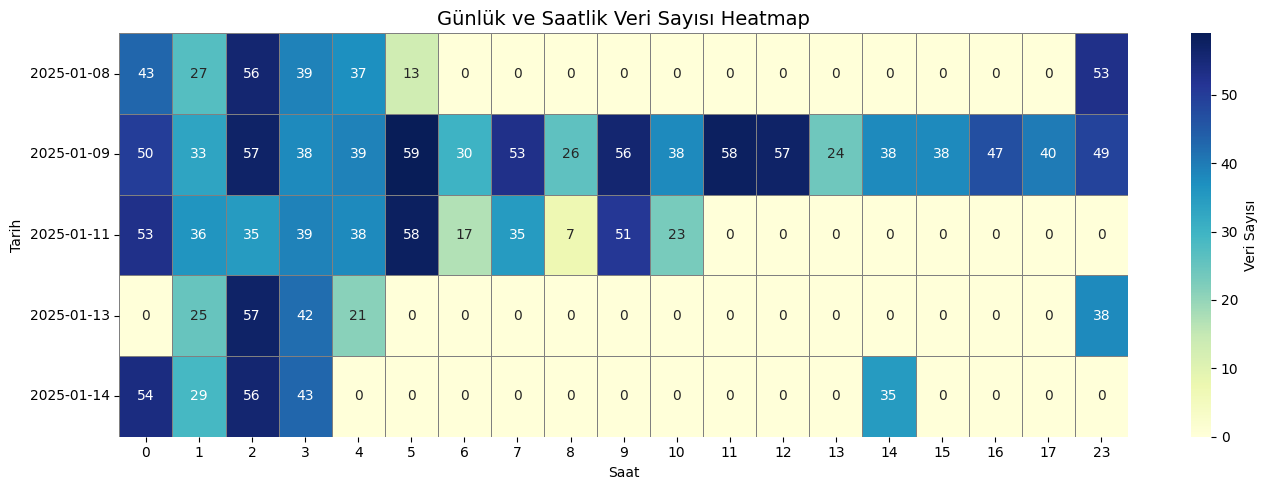

In [32]:
plot_daily_hourly_heatmap(df_filtered)

Önerilen Saat Aralığı: 00:00 - 05:59

In [33]:
df_filtered = df_filtered[(df_filtered["saat"] >= 0) & (df_filtered["saat"] < 6)]

In [34]:
df_filtered.shape

(1077, 16)

## Dakikalık Veri Tamamlama 

Veri Eksikliği ve Heatmap Gözlemi

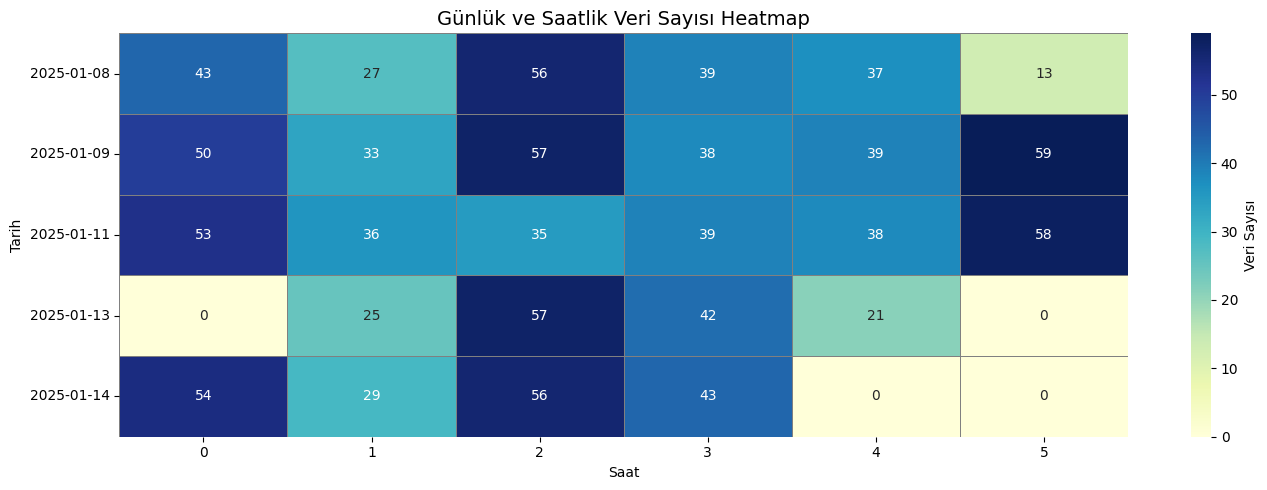

In [35]:
plot_daily_hourly_heatmap(df_filtered, datetime_column="tarih")

In [36]:
df_filtered.head()

,tarih,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS,datetime,saat,gun
51,2025-01-08 00:00:19,1,54352,MAK1,0.10,5,2.79,54,948,378,169,960,850,2025-01-08 00:00:19,0,2025-01-08
52,2025-01-08 00:01:01,1,54353,MAK1,0.09,6,2.81,55,932,378,169,944,850,2025-01-08 00:01:01,0,2025-01-08
53,2025-01-08 00:02:29,1,54355,MAK1,0.09,6,2.91,55,940,378,168,952,850,2025-01-08 00:02:29,0,2025-01-08
54,2025-01-08 00:03:10,1,54356,MAK1,0.10,6,2.97,55,920,380,169,928,855,2025-01-08 00:03:10,0,2025-01-08
55,2025-01-08 00:04:34,1,54358,MAK1,0.10,6,2.92,55,940,375,169,952,843,2025-01-08 00:04:34,0,2025-01-08


In [37]:
df_filtered['datetime'] = df_filtered['datetime'].dt.floor('min')

In [38]:
df_filtered.head()

,tarih,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS,datetime,saat,gun
51,2025-01-08 00:00:19,1,54352,MAK1,0.10,5,2.79,54,948,378,169,960,850,2025-01-08 00:00:00,0,2025-01-08
52,2025-01-08 00:01:01,1,54353,MAK1,0.09,6,2.81,55,932,378,169,944,850,2025-01-08 00:01:00,0,2025-01-08
53,2025-01-08 00:02:29,1,54355,MAK1,0.09,6,2.91,55,940,378,168,952,850,2025-01-08 00:02:00,0,2025-01-08
54,2025-01-08 00:03:10,1,54356,MAK1,0.10,6,2.97,55,920,380,169,928,855,2025-01-08 00:03:00,0,2025-01-08
55,2025-01-08 00:04:34,1,54358,MAK1,0.10,6,2.92,55,940,375,169,952,843,2025-01-08 00:04:00,0,2025-01-08


### Uygulanan Veri Tamamlama Adımları

Eksik Dakika Kayıtlarının Eklenmesi

In [39]:
import pandas as pd

# datetime sütunu datetime formatında olmalı ve sıralı olmalı
df_filtered["datetime"] = pd.to_datetime(df_filtered["datetime"])
df_filtered = df_filtered.sort_values("datetime")

# Saat aralığı: 00:00 - 06:00 olan günleri al
df_filtered["gun"] = df_filtered["datetime"].dt.date
df_filtered["saat"] = df_filtered["datetime"].dt.hour
df_filtered = df_filtered[(df_filtered["saat"] >= 0) & (df_filtered["saat"] < 6)]

# Her gün için eksik zaman aralıklarını bul
full_index = []
for gun in df_filtered["gun"].unique():
    start = pd.Timestamp(f"{gun} 00:00:00")
    end = pd.Timestamp(f"{gun} 05:59:00")
    full_range = pd.date_range(start=start, end=end, freq="T")
    full_index.extend(full_range)

# Tüm dakikaları içeren seri (datetime)
full_df = pd.DataFrame({"datetime": pd.Series(full_index).drop_duplicates()})

# Orijinal datetime'larda olmayanları bul
eksik_zamanlar = full_df.loc[~full_df["datetime"].isin(df_filtered["datetime"])]

# Eksik zamanlar için sadece datetime olan boş dataframe oluştur
empty_rows = pd.DataFrame(columns=df_filtered.columns)
empty_rows["datetime"] = eksik_zamanlar["datetime"]
empty_rows = empty_rows.sort_values("datetime")

# Bu eksik satırları orijinal veriyle birleştir
df_final = pd.concat([df_filtered, empty_rows], ignore_index=True).sort_values("datetime")


C:\Users\havva\AppData\Local\Temp\ipykernel_1208\2545532770.py:17: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=start, end=end, freq="T")
C:\Users\havva\AppData\Local\Temp\ipykernel_1208\2545532770.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_final = pd.concat([df_filtered, empty_rows], ignore_index=True).sort_values("datetime")


In [40]:
empty_rows.head()

,tarih,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS,datetime,saat,gun
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-08 00:21:00,NaN,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-08 00:25:00,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-08 00:26:00,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-08 00:27:00,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-08 00:28:00,NaN,NaN


In [41]:
empty_rows.isnull().sum()

tarih              723
kalip              723
cycleSayisi        723
makineKodu         723
SCLPAR_VALUE_V1    723
SCLPAR_VALUE_P1    723
SCLPAR_VALUE_V2    723
SCLPAR_VALUE_L2    723
SCLPAR_VALUE_TM    723
SCLPAR_VALUE_P3    723
SCLPAR_VALUE_SM    723
SCLPAR_VALUE_TR    723
SCLPAR_VALUE_PS    723
datetime             0
saat               723
gun                723
dtype: int64

In [42]:
df_final.head()

,tarih,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS,datetime,saat,gun
0,2025-01-08 00:00:19,1,54352,MAK1,0.10,5,2.79,54,948,378,169,960,850,2025-01-08 00:00:00,0,2025-01-08
1,2025-01-08 00:01:01,1,54353,MAK1,0.09,6,2.81,55,932,378,169,944,850,2025-01-08 00:01:00,0,2025-01-08
2,2025-01-08 00:02:29,1,54355,MAK1,0.09,6,2.91,55,940,378,168,952,850,2025-01-08 00:02:00,0,2025-01-08
3,2025-01-08 00:03:10,1,54356,MAK1,0.10,6,2.97,55,920,380,169,928,855,2025-01-08 00:03:00,0,2025-01-08
4,2025-01-08 00:04:34,1,54358,MAK1,0.10,6,2.92,55,940,375,169,952,843,2025-01-08 00:04:00,0,2025-01-08


In [43]:
df_final.isnull().sum()

tarih              723
kalip              723
cycleSayisi        723
makineKodu         723
SCLPAR_VALUE_V1    723
SCLPAR_VALUE_P1    723
SCLPAR_VALUE_V2    723
SCLPAR_VALUE_L2    723
SCLPAR_VALUE_TM    723
SCLPAR_VALUE_P3    723
SCLPAR_VALUE_SM    723
SCLPAR_VALUE_TR    723
SCLPAR_VALUE_PS    723
datetime             0
saat               723
gun                723
dtype: int64

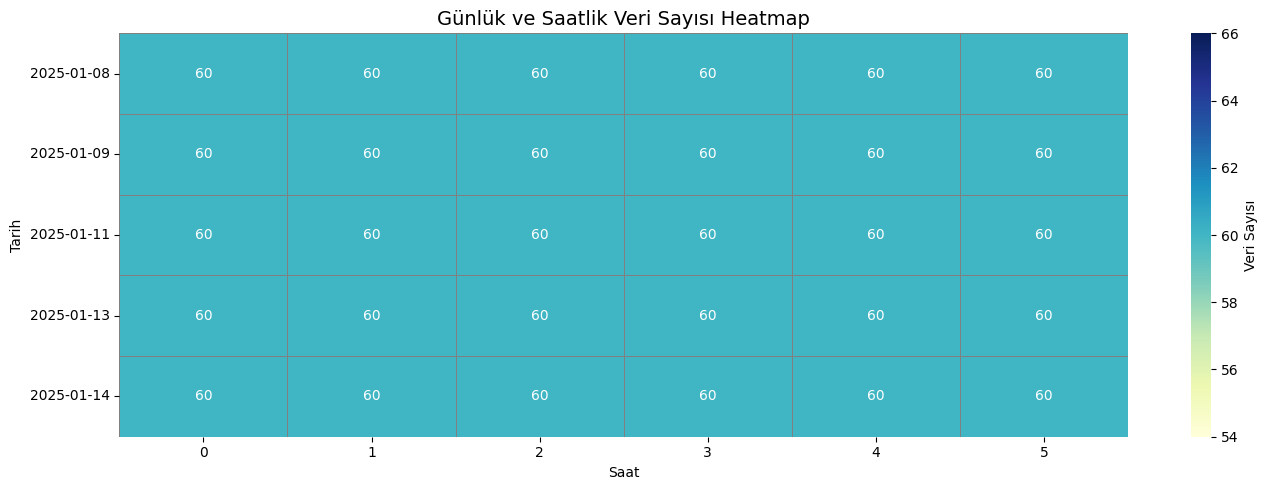

In [44]:
plot_daily_hourly_heatmap(df_final, datetime_column="datetime")

In [45]:
df_final.shape

(1800, 16)

In [46]:
df_final.head(2)

,tarih,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS,datetime,saat,gun
0,2025-01-08 00:00:19,1,54352,MAK1,0.10,5,2.79,54,948,378,169,960,850,2025-01-08 00:00:00,0,2025-01-08
1,2025-01-08 00:01:01,1,54353,MAK1,0.09,6,2.81,55,932,378,169,944,850,2025-01-08 00:01:00,0,2025-01-08


In [47]:
# Sadece sütunları kaldırmak için
df_yeni = df_final.drop(columns=['gun', 'tarih', 'saat'], errors='ignore')

In [48]:
df_yeni.head()

,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS,datetime
0,1,54352,MAK1,0.10,5,2.79,54,948,378,169,960,850,2025-01-08 00:00:00
1,1,54353,MAK1,0.09,6,2.81,55,932,378,169,944,850,2025-01-08 00:01:00
2,1,54355,MAK1,0.09,6,2.91,55,940,378,168,952,850,2025-01-08 00:02:00
3,1,54356,MAK1,0.10,6,2.97,55,920,380,169,928,855,2025-01-08 00:03:00
4,1,54358,MAK1,0.10,6,2.92,55,940,375,169,952,843,2025-01-08 00:04:00


In [49]:
df_yeni.shape

(1800, 13)

cycleSayisi Sütununda NaN Olan Satırların Doldurma Stratejisi

In [50]:
import pandas as pd

df_yeni['datetime'] = pd.to_datetime(df_yeni['datetime'])
df_yeni['cycleSayisi'] = pd.to_numeric(df_yeni['cycleSayisi'], errors='coerce')
df_yeni['date'] = df_yeni['datetime'].dt.date

final_groups = []

for date, group in df_yeni.groupby('date'):
    group = group.sort_values('datetime').copy()
    group = group.reset_index(drop=True)

    # Tüm bilinen cycle indekslerini al
    known_indices = group[group['cycleSayisi'].notna()].index.tolist()

    if len(known_indices) == 0:
        # Hiç bilinen yoksa, rastgele başlat
        group['cycleSayisi'] = range(100000, 100000 + len(group))

    else:
        for i in range(len(known_indices) - 1):
            start_idx = known_indices[i]
            end_idx = known_indices[i + 1]
            start_val = group.loc[start_idx, 'cycleSayisi']
            end_val = group.loc[end_idx, 'cycleSayisi']

            if start_val == end_val:
                # Başlangıç ve bitiş değeri eşitse, aradakileri sabit tut
                group.loc[start_idx+1:end_idx-1, 'cycleSayisi'] = start_val
            else:
                # Farklıysa interpolate yap
                group.loc[start_idx:end_idx, 'cycleSayisi'] = group.loc[start_idx:end_idx, 'cycleSayisi'].interpolate(method='linear')

        # İlk bilinen değerden önce varsa, geriye doğru sabit doldur
        first_known = known_indices[0]
        group.loc[:first_known-1, 'cycleSayisi'] = group.loc[first_known, 'cycleSayisi']

        # Son bilinen değerden sonra varsa, ileri doğru arttır
        last_known = known_indices[-1]
        for i in range(last_known + 1, len(group)):
            group.loc[i, 'cycleSayisi'] = group.loc[i - 1, 'cycleSayisi'] + 1

    group['cycleSayisi'] = group['cycleSayisi'].round().astype(int)
    final_groups.append(group)

# Sonuçları birleştir
df_final = pd.concat(final_groups).sort_values('datetime').reset_index(drop=True)
df_final.drop(columns='date', inplace=True)


In [51]:
df_final.isnull().sum()

kalip              723
cycleSayisi          0
makineKodu         723
SCLPAR_VALUE_V1    723
SCLPAR_VALUE_P1    723
SCLPAR_VALUE_V2    723
SCLPAR_VALUE_L2    723
SCLPAR_VALUE_TM    723
SCLPAR_VALUE_P3    723
SCLPAR_VALUE_SM    723
SCLPAR_VALUE_TR    723
SCLPAR_VALUE_PS    723
datetime             0
dtype: int64

In [52]:
df_final.head()

,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS,datetime
0,1,54352,MAK1,0.10,5,2.79,54,948,378,169,960,850,2025-01-08 00:00:00
1,1,54353,MAK1,0.09,6,2.81,55,932,378,169,944,850,2025-01-08 00:01:00
2,1,54355,MAK1,0.09,6,2.91,55,940,378,168,952,850,2025-01-08 00:02:00
3,1,54356,MAK1,0.10,6,2.97,55,920,380,169,928,855,2025-01-08 00:03:00
4,1,54358,MAK1,0.10,6,2.92,55,940,375,169,952,843,2025-01-08 00:04:00


Diğer Sütunlarda NaN Olan Satırların Doldurulması

In [53]:
# Tüm eksik verileri ffill ile doldur 
df_final = df_final.ffill()

C:\Users\havva\AppData\Local\Temp\ipykernel_1208\3855553402.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final = df_final.ffill()


In [54]:
df_final.isnull().sum()

kalip              0
cycleSayisi        0
makineKodu         0
SCLPAR_VALUE_V1    0
SCLPAR_VALUE_P1    0
SCLPAR_VALUE_V2    0
SCLPAR_VALUE_L2    0
SCLPAR_VALUE_TM    0
SCLPAR_VALUE_P3    0
SCLPAR_VALUE_SM    0
SCLPAR_VALUE_TR    0
SCLPAR_VALUE_PS    0
datetime           0
dtype: int64

In [55]:
df_final.head()

,kalip,cycleSayisi,makineKodu,SCLPAR_VALUE_V1,SCLPAR_VALUE_P1,SCLPAR_VALUE_V2,SCLPAR_VALUE_L2,SCLPAR_VALUE_TM,SCLPAR_VALUE_P3,SCLPAR_VALUE_SM,SCLPAR_VALUE_TR,SCLPAR_VALUE_PS,datetime
0,1,54352,MAK1,0.10,5,2.79,54,948,378,169,960,850,2025-01-08 00:00:00
1,1,54353,MAK1,0.09,6,2.81,55,932,378,169,944,850,2025-01-08 00:01:00
2,1,54355,MAK1,0.09,6,2.91,55,940,378,168,952,850,2025-01-08 00:02:00
3,1,54356,MAK1,0.10,6,2.97,55,920,380,169,928,855,2025-01-08 00:03:00
4,1,54358,MAK1,0.10,6,2.92,55,940,375,169,952,843,2025-01-08 00:04:00


In [56]:
df_final.shape

(1800, 13)

In [57]:
df_final.to_csv("yeni_veri/520TonEnjPres_verileri_temizlenmis.csv", index=False)